k = 3
Cross-validation scores: [0.575      0.61538462 0.58974359 0.56410256 0.51282051]
Mean CV Accuracy: 0.57
------------------------------
k = 5
Cross-validation scores: [0.65       0.58974359 0.56410256 0.56410256 0.61538462]
Mean CV Accuracy: 0.60
------------------------------
k = 7
Cross-validation scores: [0.575      0.53846154 0.56410256 0.48717949 0.66666667]
Mean CV Accuracy: 0.57
------------------------------


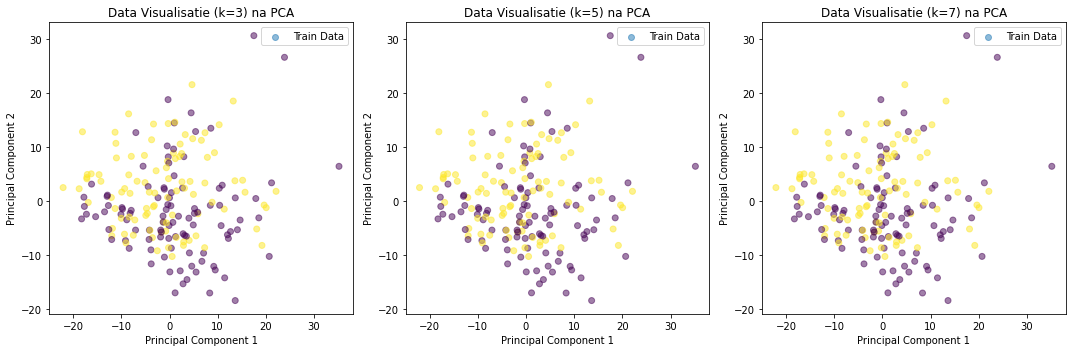

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Data inladen
train_data = pd.read_csv('train_data.csv')

# Data voorbereiden
training_label = train_data['label']
training_values = train_data.drop(columns=['label'], axis=1)

# Normaliseren van de features
scaler = StandardScaler()
training_values = scaler.fit_transform(training_values)

# PCA toepassen om de data te reduceren naar ... componenten
pca = PCA(n_components= 50)
training_values_pca = pca.fit_transform(training_values)

# Verschillende waarden van k testen
k_values = [3, 5, 7]
plt.figure(figsize=(15, 5))
for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, training_values_pca, training_label, cv=5)
    print(f'k = {k}')
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean CV Accuracy: {cv_scores.mean():.2f}')
    print('-' * 30)
    
    # Data visualiseren voor elke k
    plt.subplot(1, 3, i)
    plt.scatter(training_values_pca[:, 0], training_values_pca[:, 1], c=training_label.astype('category').cat.codes, cmap='viridis', alpha=0.5, label='Train Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Data Visualisatie (k={k}) na PCA')
    plt.legend()

plt.tight_layout()
plt.show()
